# Part I - Loan Data from Prosper
## by Umar Faruq Zubairu

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading my dataset and describing its properties through the questions below.

In [5]:
#Load the data into a dataframe
loan_df=pd.read_csv('prosperLoanData.csv')

In [6]:
loan_df.sample()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
33980,5DAA3392388322994F72FDF,148555,2007-06-07 15:43:38.983000000,B,36,Defaulted,2010-04-15 00:00:00,0.16265,0.1555,0.1455,...,-126.79,0.0,1881.65,1881.65,0.0,1.0,0,0,0.0,70


In [7]:
#Checking the shape of my dataset
loan_df.shape

(113937, 81)

In [8]:
#Display the first five records from the dataset
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
#Show some information about the data
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [10]:
#Display descriptive statistic of the data
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [11]:
#Display sample records of the data
loan_df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
113544,D90D3548232571844A7A173,595093,2012-06-01 08:59:35.817000000,NaN,12,Completed,2012-12-05 00:00:00,0.09986,0.0628,0.0528,...,-38.62,0.00,0.00,0.00,0.0,1.0,0,0,0.0,198
64580,61B2357356942586126C7ED,727564,2013-03-12 16:59:05.473000000,NaN,36,Completed,2014-02-25 00:00:00,0.28032,0.2419,0.2319,...,-82.73,0.00,0.00,0.00,0.0,1.0,0,0,0.0,54
24982,2E4B3559844631923E93275,657691,2012-10-20 10:59:14.193000000,NaN,60,Current,NaN,0.20367,0.1797,0.1697,...,-275.05,0.00,0.00,0.00,0.0,1.0,0,0,0.0,320
113556,CA4F359787307365173D956,1099931,2013-12-27 14:07:06.713000000,NaN,36,Current,NaN,0.27776,0.2394,0.2294,...,-6.41,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
33380,5D1136008605497944DC4E3,1121542,2014-01-20 16:08:02.960000000,NaN,36,Current,NaN,0.12081,0.0930,0.0830,...,-12.74,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
52326,0AFD33728182389986F12CE,54205,2006-10-27 19:25:54.703000000,B,36,Defaulted,2008-10-07 00:00:00,0.12289,0.1159,0.1109,...,-23.70,0.00,2171.76,2171.77,0.0,1.0,0,0,0.0,118
111967,B785337320207363946016D,59089,2006-11-08 18:26:53.670000000,D,36,Completed,2009-06-02 00:00:00,0.20735,0.2000,0.1950,...,-20.47,0.00,0.00,0.00,0.0,1.0,0,0,0.0,20
24939,5D64336458879460900B458,1354,2006-03-06 19:25:21.463000000,B,36,Completed,2009-03-15 00:00:00,0.10140,0.0945,0.0845,...,-24.24,0.00,0.00,0.00,0.0,1.0,0,0,0.0,54
20729,29EF3518579960790459ED7,513430,2011-06-28 16:01:25.730000000,NaN,12,Chargedoff,2012-02-29 00:00:00,0.35843,0.2669,0.2569,...,-8.10,-97.78,2404.43,2404.43,0.0,1.0,0,0,0.0,6
9597,5C1C349379060082328885D,473122,2010-08-25 12:16:20.863000000,NaN,36,Completed,2010-12-13 00:00:00,0.29265,0.2575,0.2475,...,-7.03,0.00,0.00,0.00,0.0,1.0,0,0,0.0,81


**Stated in the Dataset Option** "You are not expected to explore all of the variables in the dataset! Focus your exploration on about 10-15 of them." 

This is because of the large number of variables present in the dataset. Hence, in this analysis I will focus on some few variables as follow

In [14]:
#Extracting the columns that I will explore
target_columns =  [
    'MemberKey','Term', 'LoanStatus', 'BorrowerRate', 'ListingCategory (numeric)', 'EmploymentStatus',
    'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'Recommendations', 'Investors'
]

In [15]:
#Creating the dataframe
target_df = loan_df[target_columns]

Now, I have a new dataframe containing the variables I want to focus on or explore. I will assess it a little using both visual and programmatic ways

In [16]:
#Shape of the new dataset. It must have same number of records but the columns/ variables differs from the original dataset.
target_df.shape

(113937, 11)

Yes! That's it. The new dataset I am focusing on has 11 variables and same number of record with the original dataset.

In [17]:
#Display the first five records from the dataset
target_df.head()

,MemberKey,Term,LoanStatus,BorrowerRate,ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
0,1F3E3376408759268057EDA,36,Completed,0.1580,0,Self-employed,3083.333333,NaN,9425,0,258
1,1D13370546739025387B2F4,36,Current,0.0920,2,Employed,6125.000000,NaN,10000,0,1
2,5F7033715035555618FA612,36,Completed,0.2750,0,Not available,2083.333333,NaN,3001,0,41
3,9ADE356069835475068C6D2,36,Current,0.0974,16,Employed,2875.000000,NaN,10000,0,158
4,36CE356043264555721F06C,36,Current,0.2085,2,Employed,9583.333333,1.0,15000,0,20


In [18]:
#Show some information about the data
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MemberKey                  113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanStatus                 113937 non-null  object 
 3   BorrowerRate               113937 non-null  float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   StatedMonthlyIncome        113937 non-null  float64
 7   TotalProsperLoans          22085 non-null   float64
 8   LoanOriginalAmount         113937 non-null  int64  
 9   Recommendations            113937 non-null  int64  
 10  Investors                  113937 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 9.6+ MB


In [19]:
#Display descriptive statistic of the data
target_df.describe()

,Term,BorrowerRate,ListingCategory (numeric),StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
count,113937.000000,113937.000000,113937.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000
mean,40.830248,0.192764,2.774209,5.608026e+03,1.421100,8337.01385,0.048027,80.475228
std,10.436212,0.074818,3.996797,7.478497e+03,0.764042,6245.80058,0.332353,103.239020
min,12.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,1.000000
25%,36.000000,0.134000,1.000000,3.200333e+03,1.000000,4000.00000,0.000000,2.000000
50%,36.000000,0.184000,1.000000,4.666667e+03,1.000000,6500.00000,0.000000,44.000000
75%,36.000000,0.250000,3.000000,6.825000e+03,2.000000,12000.00000,0.000000,115.000000
max,60.000000,0.497500,20.000000,1.750003e+06,8.000000,35000.00000,39.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 records in the dataset with 11 features (MemberKey, Term, LoanStatus, BorrowerRate, ListingCategory (numeric), EmploymentStatus, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, Recommendations and Investors)

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out What features affect a loan’s outcome. I am also interesed on finding if there are differences between loans depending on how large the original loan amount was.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the `LoanOriginalAmount` feature in the dataset will support my investigation on finding if there are differences between loans depending on how large the original loan amount was. Furthermore, the `LoanStatus` feature among others will also support my investigation.

## Univariate Exploration

> In this section, I will investigate the distributions of individual variables.

>**The framework**: I will use the "Question --> Visualization --> Observations" framework  throughout the exploration.


### What is the Employment status of the borrowers?

In [20]:
#This is a color I select from color_palette() method of seaborn to be used on some charts
mycolor=sb.color_palette()[3]

Text(0.5, 1.0, 'Employment Status among the Borrowers')

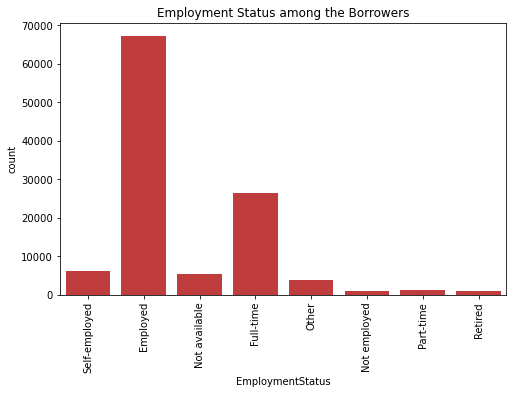

In [21]:
# Visualing the employment status of the borrowers using bar chart
plt.figure(figsize=[8, 5])
sb.countplot(data = target_df, x = 'EmploymentStatus', color = mycolor);
plt.xticks(rotation = 90);
plt.title('Employment Status among the Borrowers')

##### My Observation (s)

- Majority of borrowers are Employed
- The least number of borrowers fall between the **Not Employed** and **Retired** categories

### What is the Loan  status of the borrowers?

Text(0.5, 1.0, 'Loan Status among the Borrowers')

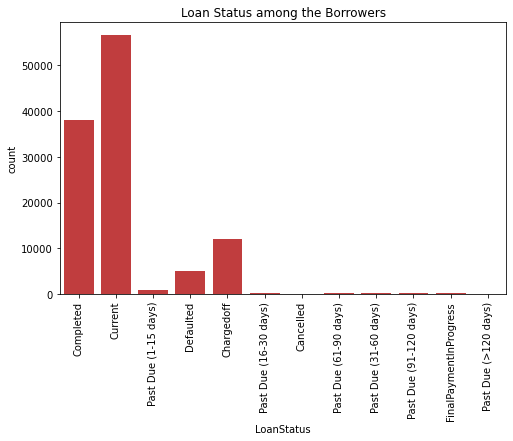

In [22]:
# Visualing the loan status of the borrowers using bar chart
plt.figure(figsize=[8, 5])
sb.countplot(data = target_df, x = 'LoanStatus', color = mycolor);
plt.xticks(rotation = 90);
plt.title('Loan Status among the Borrowers')

##### My Observation (s)

- The loan status is mostly **Current**
- After **Current** status of the loan, the second frequent Status is **Completed**
- The *Past Due* loans are categorized based on how long is the due.

### How is the Stated Monthly Income of borrowers

Text(0.5, 1.0, 'Stated Monthly Income')

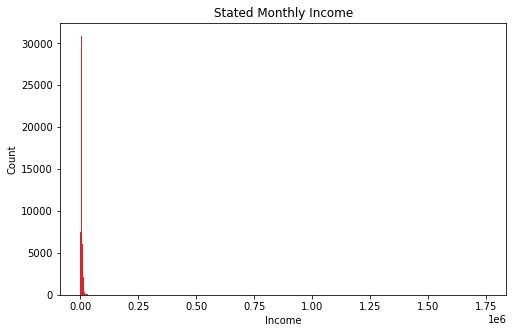

In [23]:
#In here, I am checking to see the performance of monthly income of the borrowers
plt.figure(figsize=[8, 5])
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000, color = mycolor);
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Stated Monthly Income')

**Opps!** What a skewed chart. This is unusual, the chart is skewed to the right. Hence I will take a deeper look into it to clean things up.

In [24]:
#Going deep into the feature of the data to find something
income_std = target_df['StatedMonthlyIncome'].std() #Standard deviation of the variable
income_mean = target_df['StatedMonthlyIncome'].mean() #Mean of the variable
boundary = income_mean + income_std * 3               #Setting boundary
len(target_df[target_df['StatedMonthlyIncome'] >= boundary]) #Checking the number of observation greater than the boundary

428

##### My Observation (s)

- The chart is skewed to the right. And difficult to visualize from the view.
- After taken a deeper look into it, I found there are **428 Outliers**

### Zooming Stated Monthly Income of borrowers

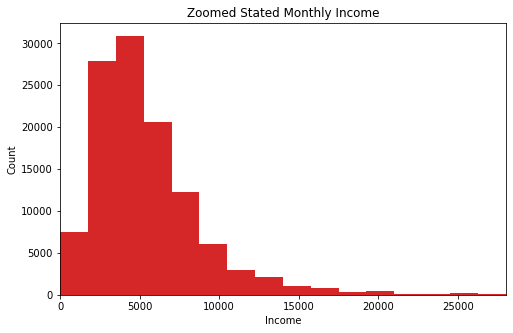

In [25]:
#In here, I am checking to see the monthly income of the borrowers
plt.figure(figsize=[8, 5])
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000, color = mycolor);
plt.title('Zoomed Stated Monthly Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xlim(0, boundary);

##### My Observation (s)

- After zooming the chart, the chart still has a noticeable skew. Rightly skewed.

### Whats the performance of the length of the loan in months

In this,I will use pie chart to depict the length of loans by term.

In [26]:
# Count the frequency of unique values in the `Term` column of target_df dataframe. 
# By default, returns the decreasing order of the frequency
term_count=target_df.Term.value_counts()
term_count

36    87778
60    24545
12     1614
Name: Term, dtype: int64

**Justification:** Even though a bar chart is usually more versatile and should be a preferred choice for exploring qualitative variables, that's not to say that pie chart should not be used however.  I choose to use the pie chart keeping in mind some guidlines taught in the lessons, making sure that:
- Showing how the loan is broken down into parts (terms)
- Knowing that the slices are not much, they are in small number (there are only 3 terms).

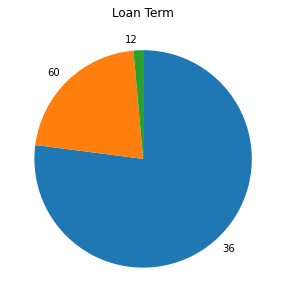

In [27]:
# create a pie plot of the Term
#Clockwise
plt.figure(figsize=[10, 5])
plt.title('Loan Term')
plt.pie(term_count, labels = term_count.index, startangle = 90, counterclock = False);

##### My Observation (s)

- The largest portion of the Pie chart has a term of 3 years (36 months)
- The least of the loans' term is 1 year (12 months)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Distribution of monthly stated income is very awkward: with a hundreds of outliers and very large range but still it was right skew. The majority of borrowers are employed and all other categories as small part of borrowers and most of the loans in the data set are actually current loans as well.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The majority of loans are actually current loans. Since my main goal is to define driving factors of outcome of loan, I am not interested in any current loans.

## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in my data
data.

>**The framework**: I use the "Question-Visualization-Observations" framework  throughout the exploration.

In [28]:
#Making a copy of my data
target_df2=target_df.copy()

**Justification:** To make sure my data is not altered for the above already visualized features and findings, I make a copy of the data for better exploring in this section and forward.

In [29]:
#Displaying the shape of my data
target_df2.shape

(113937, 11)

In [30]:
#Displaying 20 random sample of my data
target_df2.sample(20)

,MemberKey,Term,LoanStatus,BorrowerRate,ListingCategory (numeric),EmploymentStatus,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,Recommendations,Investors
36393,79913365459222117208358,36,Completed,0.0964,0,Full-time,6250.000000,NaN,10000,0,239
50922,AFD13705339079808882E5D,36,Current,0.2624,2,Employed,4166.666667,NaN,3000,0,1
5526,3C773696410273511EAEA50,60,Current,0.1730,1,Employed,6250.000000,NaN,10000,0,1
105841,6B433704801803626E58CF6,36,Current,0.1500,1,Employed,5833.333333,NaN,15000,0,1
9872,48893704295645572749DEE,60,Current,0.1655,1,Employed,6000.000000,NaN,20000,0,1
55746,E251352203256975162FE33,60,Current,0.2610,1,Employed,2916.666667,1.0,10000,0,25
3436,717435112811991725F55A3,36,Completed,0.1414,13,Employed,8583.333333,1.0,10000,0,68
44216,9AFE3365360500173354F69,36,Defaulted,0.1890,0,Not available,10000.000000,NaN,5000,0,81
40512,2DD23401227113964AE1453,36,Completed,0.1800,0,Full-time,4333.333333,NaN,3000,0,27
54839,3708358395795171176FC1C,60,Current,0.2432,1,Employed,4000.000000,NaN,6000,0,1


In [31]:
#Reframing the data structure for proper plotting
condition = (target_df2['LoanStatus'] == 'Completed') | (target_df2['LoanStatus'] == 'Defaulted') |\
                  (target_df2['LoanStatus'] == 'Chargedoff')
target_df2 = target_df2[condition]

def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df2['LoanStatus'] = target_df2.apply(change_to_defaulted, axis=1)
target_df2['LoanStatus'].value_counts()

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

**NB:** After reframing my dataset I got **38,074** completed loans and **17,010** defaulted loans.

In [32]:
#Changing ListingCategory feature to Categorical
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categorie(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]
    
target_df2['ListingCategory (numeric)'] = target_df2.apply(reduce_categorie, axis=1)
target_df2['ListingCategory (numeric)'].value_counts()

Other                 28177
Debt Consolidation    17867
Business               4257
Home Improvement       3244
Auto                   1539
Name: ListingCategory (numeric), dtype: int64

Variable `Listing Category` is set up as numeric and most of the values have very **low frequency**. to simply visualize the data I have change it to **categorical** and reduce the number of categories. 

### Whats the relationship between Loan Status and the Total Prosper Loans?

My curiosity is all about, *If there is any relationship between the `TotalProsperLoans` and `LoanStatus`*

Text(0.5, 1.0, 'Loan Status Vs Total Prosper Loans')

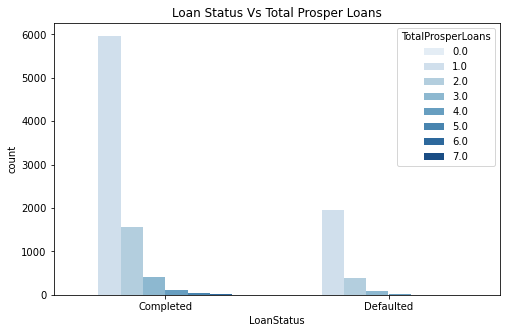

In [33]:
plt.figure(figsize = [8, 5])
sb.countplot(data = target_df2, x = 'LoanStatus', hue = 'TotalProsperLoans', palette = 'Blues')
plt.title('Loan Status Vs Total Prosper Loans')

##### My Observation (s)

- Borrowers that have least amount of prior loans are the one that completed their loans the most.

### Whats the relationship between Loan Status and the Listing Category?

Text(0.5, 1.0, 'Loan Status Vs Listing Category')

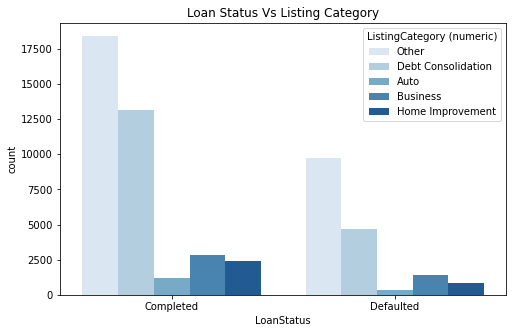

In [34]:
#Plotting the relationship between the two features
plt.figure(figsize = [8, 5])
sb.countplot(data = target_df2, x = 'LoanStatus', hue = 'ListingCategory (numeric)', palette = 'Blues');
plt.title('Loan Status Vs Listing Category')

##### My Observation (s)

- In both the graphs, **Other** category have the highest frequency
- **Dept Consolidation** category is the second frequent in both the graphs

### Whats the relationship between Loan Status and the Employment Status?

Text(0.5, 1.0, 'Loan Status Vs Employment Status')

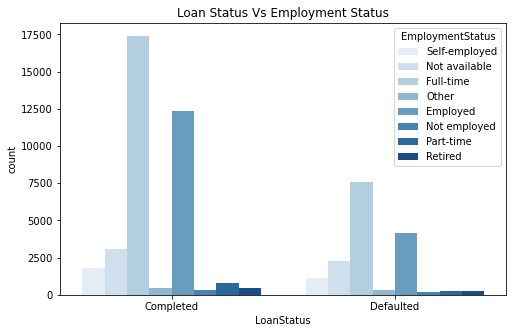

In [37]:
#Plotting the relationship between the two features
plt.figure(figsize = [8, 5])
sb.countplot(data = target_df2, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Blues');
plt.title('Loan Status Vs Employment Status')

##### My Observation (s)

- In both the graphs, **Full Time** employment status category have the highest frequency.
- Unbelievable! The number of retired borrowers who completed their loans is greater than the number of retired borrowers who didn't completed their loans. 

### Whats the relationship between Loan Status and the Loan Original Amount?

Text(0.5, 1.0, 'Loan Status Vs Loan Original Amount')

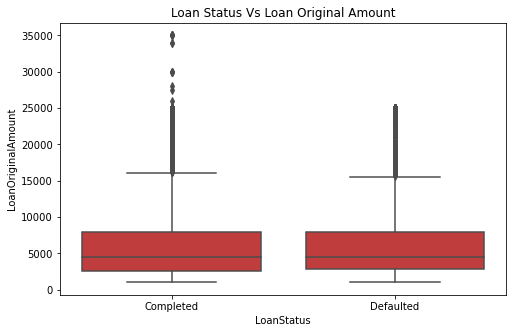

In [42]:
plt.figure(figsize=[8,5])
sb.boxplot(data = target_df2, x = 'LoanStatus', y = 'LoanOriginalAmount', color = mycolor);
plt.title('Loan Status Vs Loan Original Amount')

##### My Observation (s)

- As from Above Graph we can state that `defaulted credits` tend to be having `smaller` loan amount than `completed credits` onces.

### Whats the relationship between Listing Category and the Employment Status?

Text(0.5, 1.0, 'Listing Category Vs Employment Status')

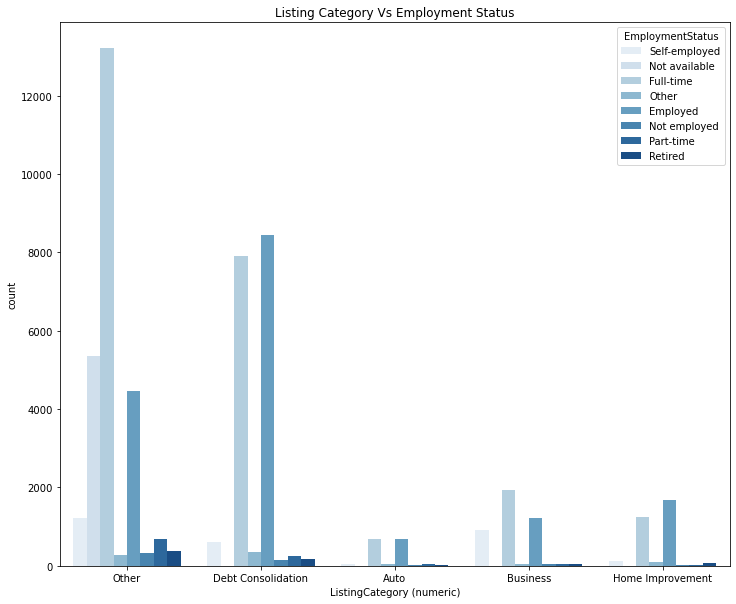

In [43]:
plt.figure(figsize = [12, 10])
sb.countplot(data = target_df2, x = 'ListingCategory (numeric)', hue = 'EmploymentStatus', palette = 'Blues');
plt.title('Listing Category Vs Employment Status')

##### My Observation (s)

- Other than the **Other** Listing category which comprises of different Listings the borrower selected, **Debt Consolidation** Listing has the highest frequency of employment status.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In Loan status vs Original Loan amount, completed credits tend to be bigger/ greater than defaulted credits onces. Employment status of individuals with lower counts of Listing Category tends to be 'Not employed', 'Retired', 'Not available' or 'Part-time'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Borrowers that have no prior loans are the one that completed their loans the most.

## Multivariate Exploration

### Listing Category, Loan Original Amount and the Loan Status
> In this, I want to plot the relationship between Loan `Original Amount`, `Listing Category`, and `Loan Status`. 

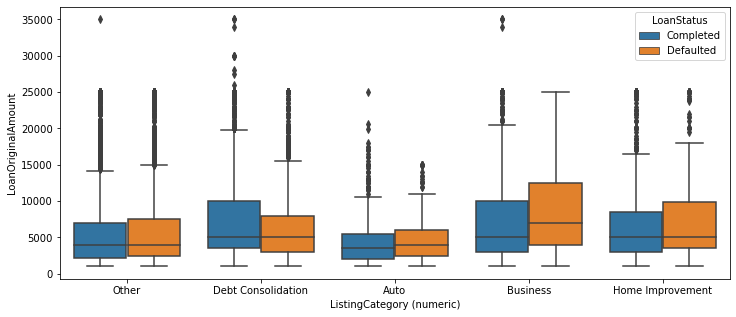

In [44]:
#Listing, Loan Amount and Loan Status
plt.figure(figsize = [12, 5])
sb.boxplot(data=target_df2, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

##### My Observation (s)
>I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. 

The kind of relationships I spot in this plot:

- The plot shows that in almost all the listings of `Listing Category (numeric)`, borrowers with highest `Loan Original Amount` have a status of Completed loan.

### Employment Status, Loan Original Amount and the Loan Status

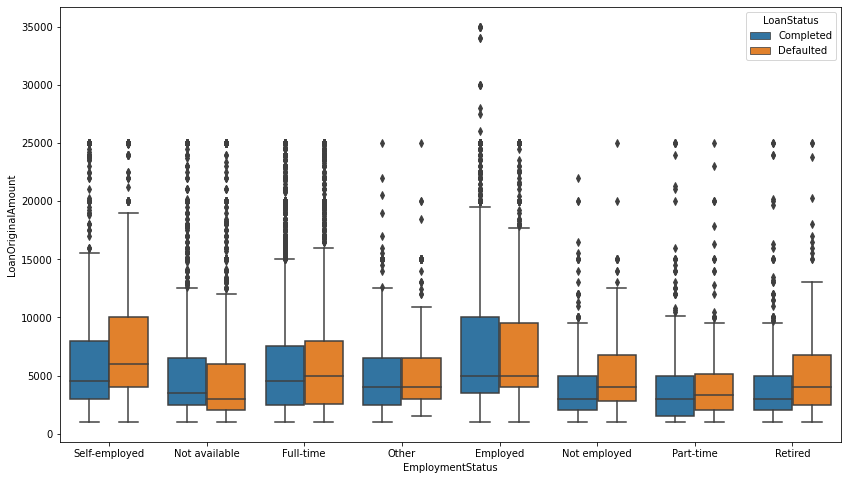

In [45]:
#employment status, Loan Amount and Loan Status
plt.figure(figsize = [14, 8])
sb.boxplot(data=target_df2, x='EmploymentStatus', y='LoanOriginalAmount', hue='LoanStatus');

##### My Observation (s)
>I went with a clustered box plot on this task since there were too many levels to make a clustered violin plot accessible. 

The kind of relationships I spot in this plot:

- The plot shows that, Borrowers with *Employed* status tends Complete their loan despite the Loan Original Amount being the highest.

### Employment Status, Loan Original Amount and the Loan Status

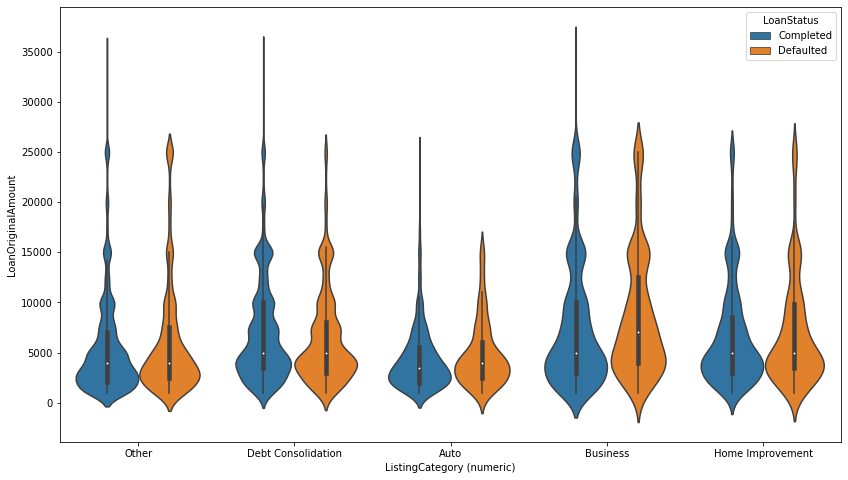

In [46]:
#listing, Loan Amount and Loan Status
plt.figure(figsize = [14, 8])
sb.violinplot(data=target_df2, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

##### My Observation (s)

The kind of relationships I spot in this plot:
*  Except for Auto, Business and Home Improvement, others have nearly equal mean.
*  Business category tend to have larger amount.

### Employment Status, Loan Original Amount and the Loan Status

Before plotting this relationship, I will reframe the data a little to have a well-plotted graphs

In [47]:
#Making a copy of the dataset
target_dff=target_df2.copy()

**Justification:** To make sure my data is not altered for the above already visualized features and findings, I make a copy of the data for better exploring.

In [48]:
#Renaming EmploymentStatus values to fit the chart
status = {'Full-time': 'FT', 'Employed': 'E', 'Not available': 'NA', 'Self-employed': 'SE', 'Part-time': 'PT', 'Retired': 'RT','Not employed': 'NE', 'Other': 'O'}
def rename_values(row):
    status_value = row['EmploymentStatus']
    if  status_value in status:
        return status[status_value]
    else:
        return status['Other']
    
target_dff['EmploymentStatus'] = target_dff.apply(rename_values, axis=1)
target_dff['EmploymentStatus'].value_counts()

FT    24957
E     16491
NA     5346
O      3050
SE     2926
PT     1056
RT      697
NE      561
Name: EmploymentStatus, dtype: int64

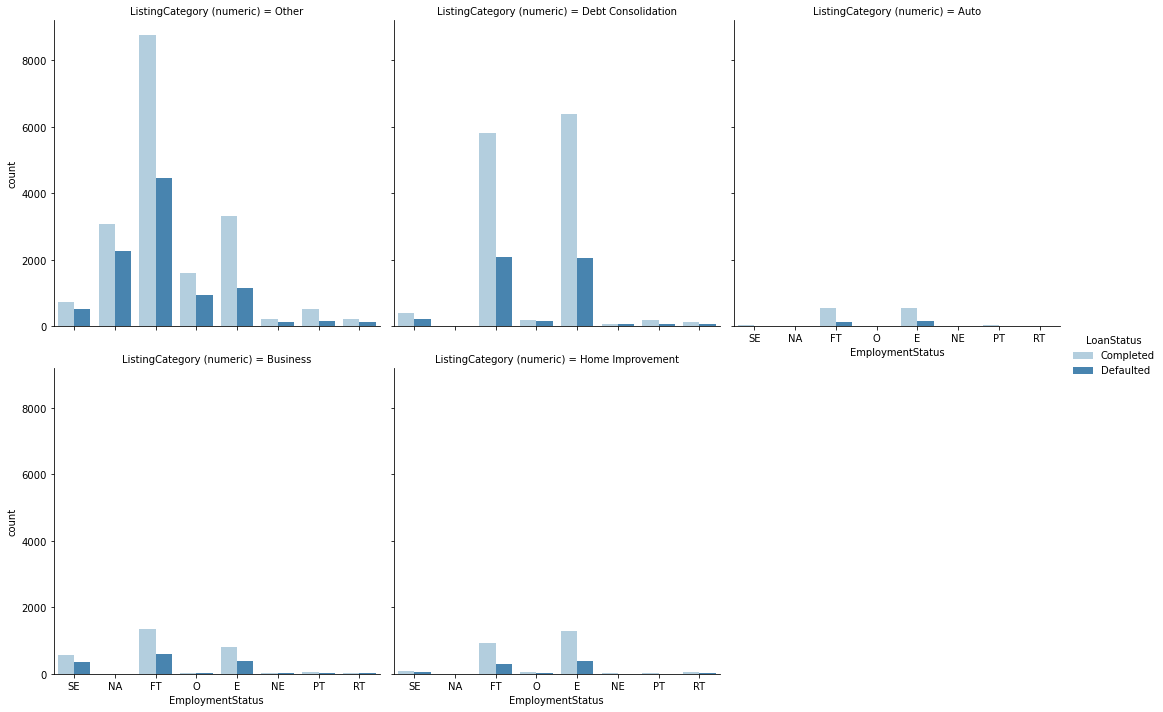

In [49]:
#Plotting the relationship in grid
sb.catplot(x = 'EmploymentStatus', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = target_dff, kind = 'count', palette = 'Blues', col_wrap = 3);

##### My Observation (s)

The kind of relationships I spot in this plot:
*  There are 5 graphs, the first and second has much clear representation than others.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Our initial assumptions were strengthened. Most of the completed credits has a higher loan amount and majority of the borrowers are employed

### Were there any interesting or surprising interactions between features?

> Borrowers with low prior loans tends to have completed their credits the most.

## Conclusions
>The majority of borrowers are employed and most of the loans in the data set are actually current loans. Furthermore, borrowers with least prior loans tends to complete their credit the most.
